In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import lmfit
import astropy
import astropy.units as u
import corner
from astropy.cosmology import Flatw0waCDM

In [2]:
# Astropy.cosmology version.Here I am using FlatwowaCDM because it has less parameters.(no Ode)
def Hz1(z1,H01,Om1,w01,wa1):
    cosmo =Flatw0waCDM(H0=H01* u.km / u.s / u.Mpc, Om0=Om1,w0=w01,wa=wa1) 
    #the redshift dependence of the dark energy density:
    I = cosmo.de_density_scale(z1)
    E = np.sqrt((Om1*(1+z1)**3.) + (1.-Om1)*I)
    HZ1 = H01*E
    return HZ1

In [3]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01,10., num=num_zs)

In [4]:
#O_m= 0.291
#w_0= -0.961
#w_1= -0.28
#H_0= 74

In [5]:
#From Planck observations for CPL mode
O_m=0.291
w_0=-0.961
w_1=-0.28
H_0=67.04

In [6]:
#Hubble comoving parameter
Hz=Hz1(zs,H_0,O_m,w_0,w_1)/(1+zs)

In [7]:
print Hz

[ 66.69454704  66.35800735  66.03021744  65.71101564  65.40024226
  65.0977396   64.803352    64.51692588  64.23830979  63.96735444
  63.7039127   63.44783963  63.19899248  62.9572307   62.72241597
  62.49441214  62.2730853   62.05830369  61.84993777  61.64786014
  61.45194559  61.26207104  61.07811553  60.8999602   60.7274883
  60.56058514  60.39913806  60.24303644  60.09217166  59.94643706
  59.80572794  59.66994154  59.53897699  59.41273529  59.2911193
  59.1740337   59.06138499  58.95308141  58.84903296  58.74915138
  58.65335008  58.56154415  58.47365032  58.38958694  58.30927394
  58.23263284  58.15958667  58.09006     58.02397888  57.96127081
  57.90186475  57.84569106  57.79268151  57.74276922  57.69588866
  57.6519756   57.61096714  57.57280162  57.53741865  57.50475906
  57.47476488  57.44737934  57.4225468   57.40021278  57.38032392
  57.36282795  57.34767368  57.33481097  57.32419071  57.31576483
  57.30948623  57.3053088   57.30318739  57.30307779  57.30493669
  57.3087217

In [8]:
#random error for Hz
error_sigma = 0.5
e1 = np.random.normal(0., error_sigma, Hz.shape)

In [9]:
H_zz= Hz + e1

In [10]:
print H_zz

[ 66.93426495  66.72990716  65.8263794   66.52140982  65.29933707
  63.89042255  64.92797101  64.67183674  64.71604373  63.53586099
  63.75702436  63.84684284  62.40906829  62.82419716  62.35350013
  62.88258239  63.08083968  61.91426017  62.10791416  62.0094122
  61.50682696  60.69250548  60.93535781  61.44826015  60.86952075
  61.29779231  60.40457168  60.20441515  59.97169823  59.93535454
  59.74160529  60.50785247  58.87481593  59.69431686  59.77585635
  59.23166913  58.18962955  58.78956965  58.74401457  58.50100981
  57.88787448  58.12267459  58.98118957  58.50509878  57.54516533
  58.42707256  58.3936308   58.58096198  58.35292219  57.84676873
  58.33307692  58.17871612  56.7715417   57.87930451  58.49861612
  57.96193189  57.8160615   56.95261239  57.01822855  58.02842671
  56.96670609  58.41788333  57.37774374  56.74209582  57.45259229
  56.54247073  56.65973032  56.57360408  57.61077571  57.60129825
  57.56272245  57.5246038   57.84217698  57.92545713  57.50051799
  57.017471

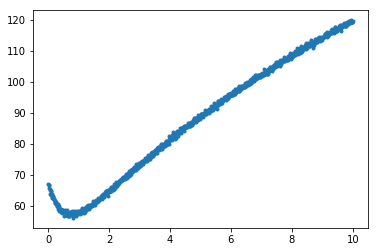

In [11]:
plt.plot(zs,H_zz, '.')

In [18]:
p = lmfit.Parameters()
p.add_many(('Om1',0.3,True,0.,2.),
           ('H01',70.,True,50.,100.),
           ('w01',-1.3,False,-3.,-0.3),
           ('wa1',-0.2,True,-5.,5.))

def residual(p):
    v = p.valuesdict()
    return (Hz1(zs,v['H01'],v['Om1'],v['w01'],v['wa1'])/(1+zs)-H_zz)/error_sigma

In [19]:
mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 35
    # data points      = 1000
    # variables        = 3
    chi-square         = 1395.01184
    reduced chi-square = 1.39920947
    Akaike info crit   = 338.902904
    Bayesian info crit = 353.626170
[[Variables]]
    Om1:  0.26110538 +/- 8.9228e-04 (0.34%) (init = 0.3)
    H01:  70.5658425 +/- 0.12512307 (0.18%) (init = 70)
    w01: -1.3 (fixed)
    wa1:  0.59521635 +/- 0.01624172 (2.73%) (init = -0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om1, H01) = -0.979
    C(H01, wa1) = -0.502
    C(Om1, wa1) =  0.354


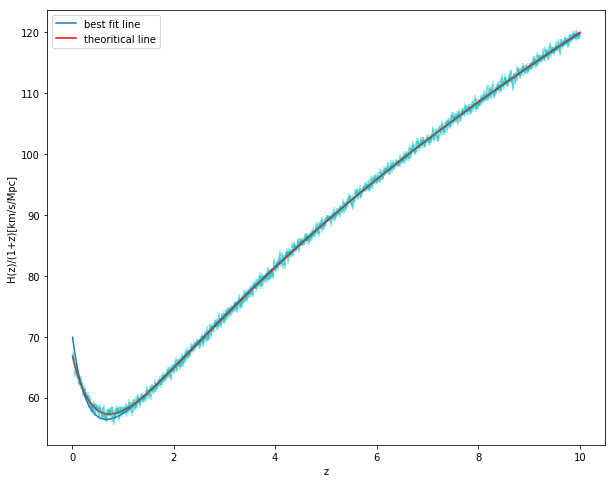

In [20]:
plt.figure(figsize=(10,8))
plt.errorbar(zs,H_zz,yerr=error_sigma,fmt='c',alpha=0.4)
bestOm1 = mi.params.valuesdict()['Om1']
bestH01 = mi.params.valuesdict()['H01']
bestw01 = mi.params.valuesdict()['w01']
bestwa1 = mi.params.valuesdict()['wa1']
plt.plot(zs,Hz1(zs,bestH01,bestOm1,bestw01,bestwa1)/(1+zs),'-',label="best fit line")
plt.plot(zs,Hz,'r',label="theoritical line")
plt.xlabel('z')
plt.ylabel('H(z)/(1+z)[km/s/Mpc]')
plt.legend(loc="upper left")
lmfit.report_fit(mi)

In [17]:
residuals=H_zz-Hz1(zs,bestH01,bestOm1,bestw01,bestwa1)/(1+zs)

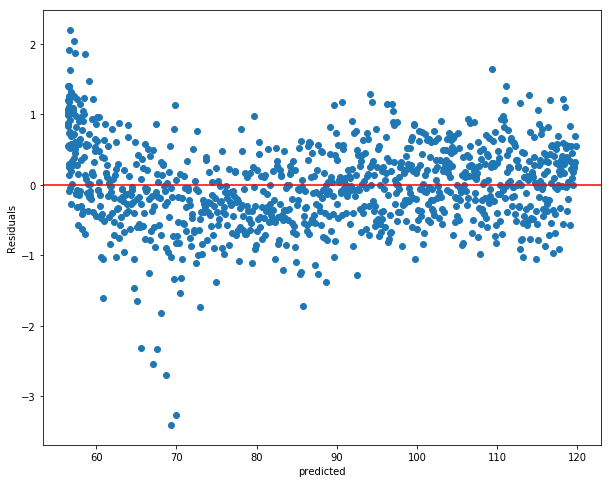

In [33]:
plt.figure(figsize=(10,8))
plt.plot(Hz1(zs,bestH01,bestOm1,bestw01,bestwa1)/(1+zs),residuals,'o')
plt.xlabel('predicted')
plt.ylabel('Residuals')
plt.axhline(y=0., color='r', linestyle='-')
plt.show()

In [23]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500,thin=1,
                         params=p, is_weighted=True)

emcee: Exception while calling your likelihood function:
  params: [ 0.30213121 69.58415617 -0.29769954]
  args: (<function residual at 0x7fb5d6790e60>, Parameters([('Om1', <Parameter 'Om1', 0.3021312134935321, bounds=[0.0:2.0]>), ('H01', <Parameter 'H01', 69.5841561696607, bounds=[50.0:100.0]>), ('w01', <Parameter 'w01', value=-1.22 (fixed), bounds=[-3.0:3.0]>), ('wa1', <Parameter 'wa1', -0.29769953793556103, bounds=[-2.0:2.0]>)]), ['Om1', 'H01', 'wa1'], array([[  0.,   2.],
       [ 50., 100.],
       [ -2.,   2.]]))
  kwargs: {'nan_policy': 'omit', 'userkws': {}, 'userargs': [], 'is_weighted': True, 'float_behavior': 'posterior'}
  exception:


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/alexandra/.local/lib/python2.7/site-packages/lmfit/minimizer.py", line 2015, in _lnpost
    out = userfcn(params, *userargs, **userkwargs)
  File "<ipython-input-20-df6895f1414c>", line 9, in residual
    return (Hz1(zs,v['H01'],v['Om1'],v['w01'],v['wa1'])/(1+zs)-H_zz)/error_sigma
  File "<ipython-input-4-e69a33b13a38>", line 3, in Hz1
    cosmo =Flatw0waCDM(H0=H01* u.km / u.s / u.Mpc, Om0=Om1,w0=w01,wa=wa1)
  File "/home/alexandra/.local/lib/python2.7/site-packages/astropy/cosmology/core.py", line 2425, in __init__
    Neff=Neff, m_nu=m_nu, name=name, Ob0=Ob0)
  File "/home/alexandra/.local/lib/python2.7/site-packages/astropy/cosmology/core.py", line 2259, in __init__
    Ob0=Ob0)
  File "/home/alexandra/.local/lib/python2.7/site-packages/astropy/cosmology/core.py", line 182, in __init__
    self._H0 =

KeyboardInterrupt: 

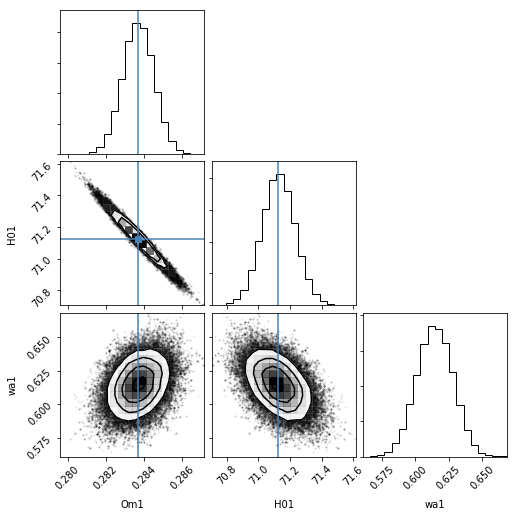

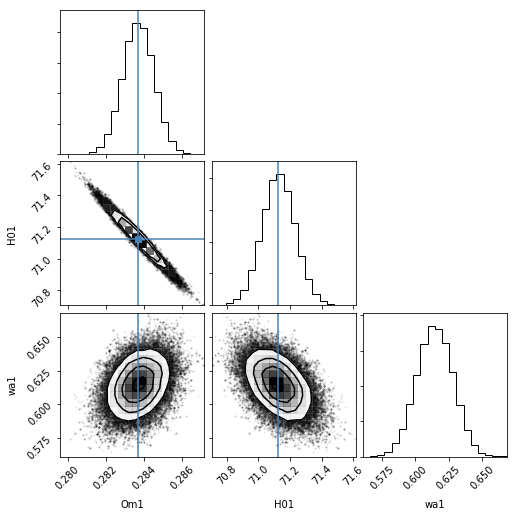

In [17]:
corner.corner(res.flatchain,labels=res.var_names, truths=list(res.params.valuesdict().values()))

In [ ]:
# plt.plot(res.flatchain.H01)
plt.plot(res.flatchain.wa1)